Matplotlib is building the font cache; this may take a moment.


Simulating network evolution...


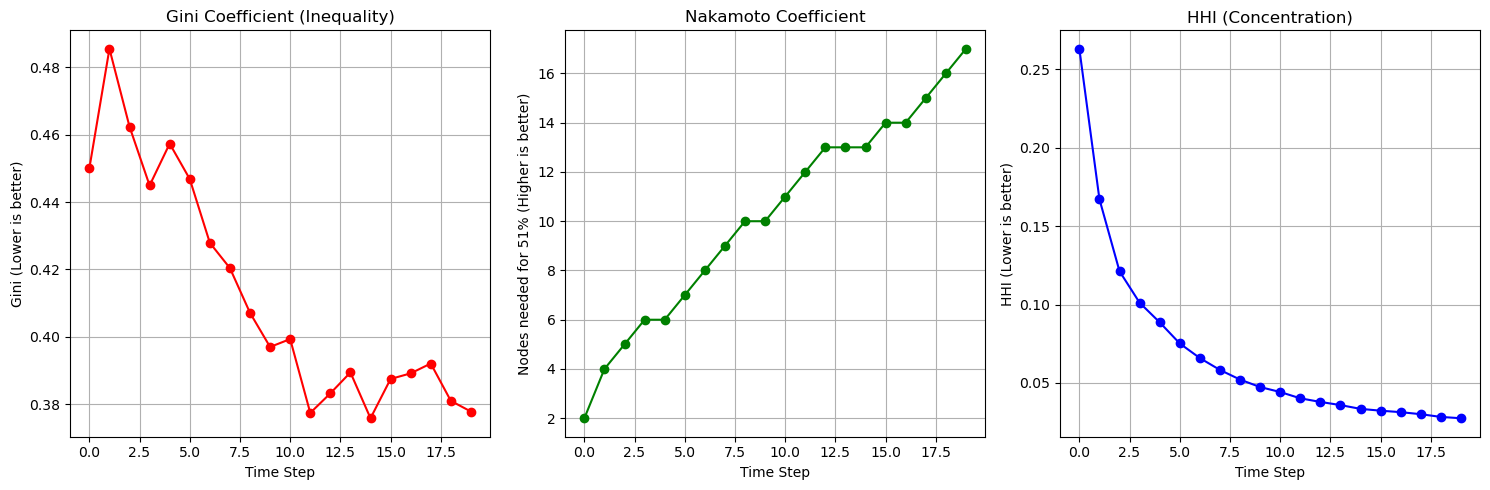

Simulation Complete.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# --- Helper Functions for Metrics ---

def calculate_gini(degrees):
    """
    Calculates Gini Coefficient for degree distribution.
    0 = Perfect Equality (Decentralized), 1 = Perfect Inequality (Centralized).
    """
    degrees = sorted(degrees)
    n = len(degrees)
    if n == 0 or sum(degrees) == 0:
        return 0
    
    # Gini formula using mean absolute difference
    # Matches the professor's formula: sum|xi - xj| / (2n * sum(xi))
    mean_degree = np.mean(degrees)
    abs_diff_sum = sum(abs(x - y) for x in degrees for y in degrees)
    gini = abs_diff_sum / (2 * n**2 * mean_degree)
    return gini

def calculate_hhi(degrees):
    """
    Calculates Herfindahl–Hirschman Index (HHI).
    High HHI = Centralized. Low HHI = Decentralized.
    """
    total_degree = sum(degrees)
    if total_degree == 0:
        return 0
    
    # Sum of squared shares of each node
    shares = [d / total_degree for d in degrees]
    hhi = sum([s**2 for s in shares])
    return hhi

def calculate_nakamoto(degrees):
    """
    Calculates Nakamoto Coefficient.
    Min nodes required to control > 50% of the total network degrees.
    High Nakamoto = Decentralized. Low Nakamoto = Centralized.
    """
    degrees = sorted(degrees, reverse=True) # Sort largest to smallest (Whales first)
    total_degree = sum(degrees)
    if total_degree == 0:
        return 0
    
    current_sum = 0
    count = 0
    threshold = total_degree * 0.51 # 51% threshold
    
    for d in degrees:
        current_sum += d
        count += 1
        if current_sum >= threshold:
            return count
    return count

# --- Simulation Setup ---

# 1. Start with a Centralized Star Graph (1 hub, 19 leaves)
num_nodes_start = 20
G = nx.star_graph(num_nodes_start - 1) 

# Lists to store history for plotting
history_hhi = []
history_gini = []
history_nakamoto = []
time_steps = list(range(20))

# --- Evolution Loop ---

print("Simulating network evolution...")

for t in time_steps:
    # 2. Calculate Metrics for current state
    degrees = [d for n, d in G.degree()]
    
    hhi = calculate_hhi(degrees)
    gini = calculate_gini(degrees)
    nakamoto = calculate_nakamoto(degrees)
    
    history_hhi.append(hhi)
    history_gini.append(gini)
    history_nakamoto.append(nakamoto)
    
    # 3. Evolve Network (Make it more decentralized)
    # Strategy: Add new nodes and randomly connect existing nodes to dilute the hub.
    
    # A. Add 2 new nodes
    new_node_id = max(G.nodes()) + 1
    G.add_node(new_node_id)
    G.add_node(new_node_id + 1)
    
    # B. Add random edges to bypass the central hub (Decentralization logic)
    # We add 5 random edges per turn between random nodes
    nodes_list = list(G.nodes())
    for _ in range(5):
        u, v = random.sample(nodes_list, 2)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
            
    # C. Connect new nodes randomly (not just to the hub)
    target = random.choice(nodes_list)
    G.add_edge(new_node_id, target)

# --- Visualization ---

plt.figure(figsize=(15, 5))

# Plot 1: Gini Coefficient
plt.subplot(1, 3, 1)
plt.plot(time_steps, history_gini, marker='o', color='red')
plt.title('Gini Coefficient (Inequality)')
plt.xlabel('Time Step')
plt.ylabel('Gini (Lower is better)')
plt.grid(True)

# Plot 2: Nakamoto Coefficient
plt.subplot(1, 3, 2)
plt.plot(time_steps, history_nakamoto, marker='o', color='green')
plt.title('Nakamoto Coefficient')
plt.xlabel('Time Step')
plt.ylabel('Nodes needed for 51% (Higher is better)')
plt.grid(True)

# Plot 3: HHI
plt.subplot(1, 3, 3)
plt.plot(time_steps, history_hhi, marker='o', color='blue')
plt.title('HHI (Concentration)')
plt.xlabel('Time Step')
plt.ylabel('HHI (Lower is better)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Simulation Complete.")